In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

In [68]:
df = pd.read_csv(r'Mall_Customers.csv')

In [69]:
# Let's create a DataFrame from your sample data
data = {
    'CustomerID': range(1, 201),
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female'] * 20,  # truncated for example
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30] * 20,  # truncated for example
    'Annual Income (k$)': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19] * 20,  # truncated for example
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72] * 20  # truncated for example
}

In [70]:
df = pd.DataFrame(data)

In [71]:
# Selecting features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [72]:
# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

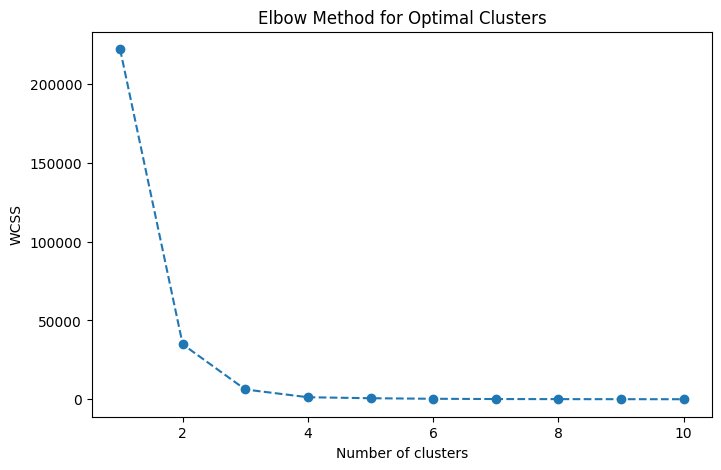

In [73]:
# Plotting the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within-cluster sum of squares
plt.show()

In [74]:
# From the Elbow plot, we can select the optimal number of clusters
# Let's assume we choose 5 clusters based on the Elbow plot
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [75]:
#Adding the cluster labels to the original dataframe
df['Cluster'] = y_kmeans

In [76]:
score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {score}')

Silhouette Score: 1.0


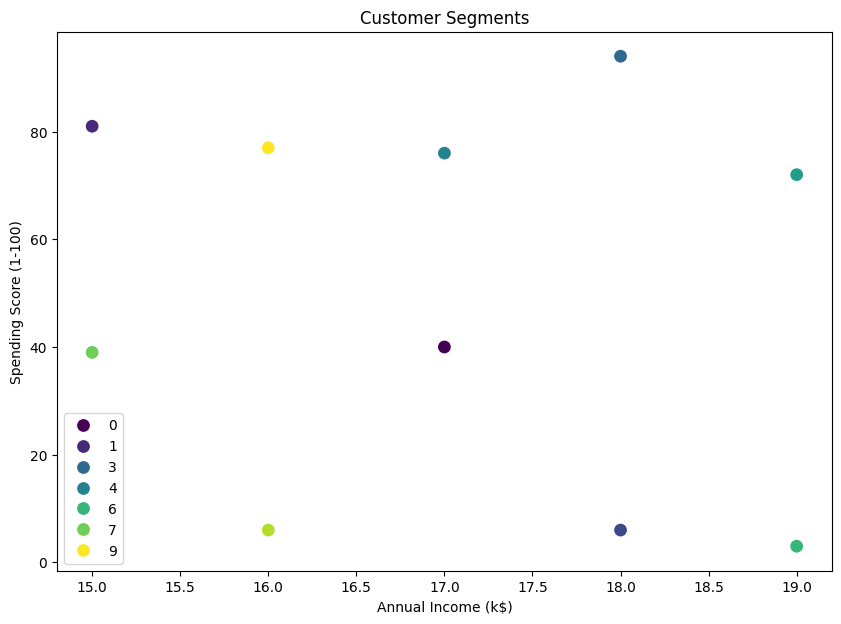

In [77]:
# Visualizing the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
